In [238]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [636]:
#Loading the test dataset
test_df=pd.read_csv(r"C:\Users\prash\OneDrive\Desktop\Mentorness\Task 3_ Credit card Prediction\\test_data.csv")
test_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [637]:
###Loading test dataset
train_df=pd.read_csv(r"C:\Users\prash\OneDrive\Desktop\Mentorness\Task 3_ Credit card Prediction\train_data.csv")
train_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [638]:
# from ydata_profiling import ProfileReport

In [639]:
# credit_card_profile=ProfileReport(train_df)## Credit card approval data profile.

#### Train and test dataset preprocessing

In [640]:

test_df.shape

(7292, 20)

In [641]:
train_df.shape

(29165, 20)

In [642]:
test_df.sample(8)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
1340,5023544,F,N,Y,0,90000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-15945,-3673,1,1,1,0,Core staff,2.0,-26.0,0
4772,5053069,F,N,Y,0,193500.0,State servant,Secondary / secondary special,Married,Office apartment,-22168,-10155,1,0,0,0,Cooking staff,2.0,-16.0,0
6032,5135630,M,Y,Y,0,220500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-30.0,0
2067,5033501,M,Y,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-15487,-3093,1,0,1,0,Laborers,2.0,-12.0,0
4835,5090801,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-18575,-4113,1,0,0,0,Accountants,2.0,-34.0,0
3165,5149079,F,Y,N,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14207,-625,1,0,0,0,Sales staff,2.0,-15.0,0
6198,5050910,M,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12865,-804,1,0,0,0,NaN,3.0,-24.0,0
3741,5079271,F,N,Y,2,225000.0,Working,Higher education,Married,House / apartment,-10029,-2705,1,0,0,0,NaN,4.0,-26.0,0


In [643]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [644]:
train_df.sample(4)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
20322,5009808,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-34.0,0
7304,5036542,M,Y,N,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-14390,-6386,1,0,0,0,Drivers,4.0,-41.0,0
17507,5126725,F,N,Y,2,112500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13552,-2418,1,0,0,0,Sales staff,4.0,-17.0,0
27511,5029411,F,N,N,0,90000.0,State servant,Secondary / secondary special,Married,Rented apartment,-17213,-1143,1,0,0,0,Core staff,2.0,-6.0,0


In [645]:
test_df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [646]:
train_df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [647]:
test_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


C:\Users\prash\AppData\Local\Temp\ipykernel_25484\3864624289.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_df.corr())


<Axes: >

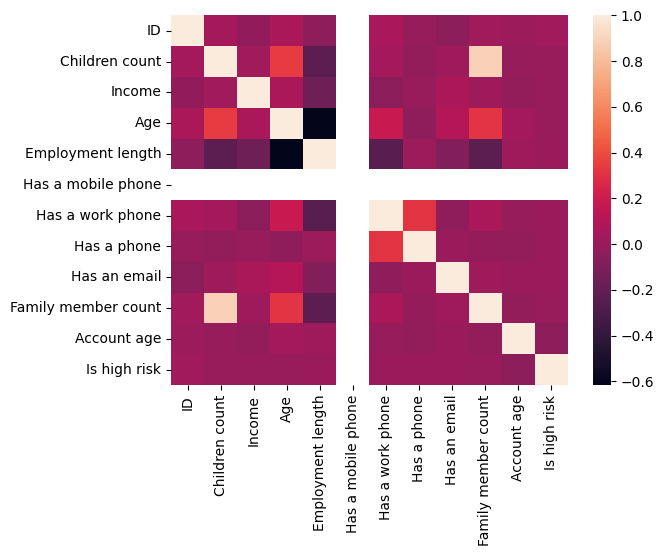

In [648]:
sns.heatmap(test_df.corr())

In [649]:
train_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


C:\Users\prash\AppData\Local\Temp\ipykernel_25484\663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

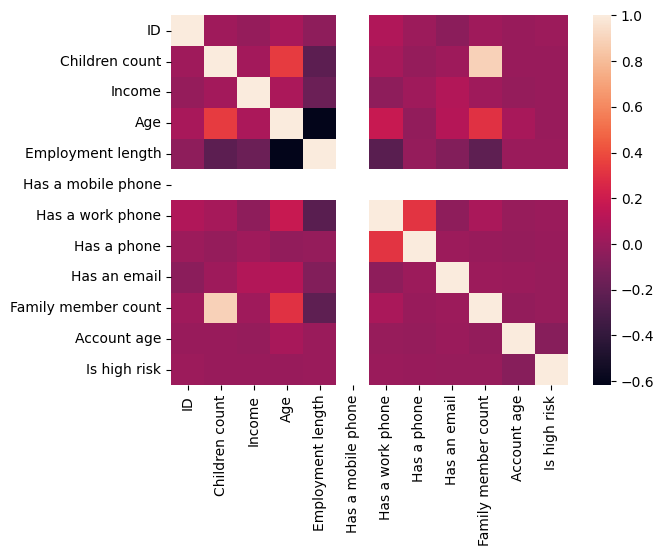

In [650]:
sns.heatmap(train_df.corr())

#### Check duplicate rows

In [651]:
test_df.duplicated().sum()

0

In [652]:
train_df.duplicated().sum()

0

#### Correlation

In [653]:
test_df.corr()

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\3536928793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.corr()


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
ID,1.000000,0.039124,-0.023177,0.067566,-0.040677,NaN,0.053806,-0.006180,-0.042030,0.034201,0.012508,0.030560
Children count,0.039124,1.000000,0.028580,0.340488,-0.225038,NaN,0.045622,-0.021006,0.019348,0.890904,-0.005045,-0.003115
Income,-0.023177,0.028580,1.000000,0.066987,-0.163423,NaN,-0.042091,0.000447,0.067458,0.017544,-0.021699,0.001724
Age,0.067566,0.340488,0.066987,1.000000,-0.615879,NaN,0.185262,-0.032820,0.109326,0.312369,0.039758,-0.002395
Employment length,-0.040677,-0.225038,-0.163423,-0.615879,1.000000,NaN,-0.246125,0.013895,-0.085551,-0.225814,0.023791,0.006763
Has a mobile phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a work phone,0.053806,0.045622,-0.042091,0.185262,-0.246125,NaN,1.000000,0.308631,-0.031107,0.062083,-0.008954,0.007891
Has a phone,-0.006180,-0.021006,0.000447,-0.032820,0.013895,NaN,0.308631,1.000000,0.006739,-0.013098,-0.018877,0.008583
Has an email,-0.042030,0.019348,0.067458,0.109326,-0.085551,NaN,-0.031107,0.006739,1.000000,0.018159,0.004492,0.006811
Family member count,0.034201,0.890904,0.017544,0.312369,-0.225814,NaN,0.062083,-0.013098,0.018159,1.000000,-0.017832,-0.003180


In [654]:
train_df.corr()

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
ID,1.000000,0.026291,-0.016257,0.053120,-0.037380,NaN,0.085670,0.013915,-0.048210,0.024724,-0.001453,0.011941
Children count,0.026291,1.000000,0.034991,0.339080,-0.230468,NaN,0.048727,-0.015110,0.015116,0.888676,-0.003722,0.000369
Income,-0.016257,0.034991,1.000000,0.068156,-0.169940,NaN,-0.036601,0.021516,0.091500,0.025338,-0.016435,-0.001760
Age,0.053120,0.339080,0.068156,1.000000,-0.616299,NaN,0.177483,-0.027621,0.104728,0.301941,0.057467,0.002422
Employment length,-0.037380,-0.230468,-0.169940,-0.616299,1.000000,NaN,-0.242055,-0.012511,-0.085673,-0.220102,0.005643,0.005398
Has a mobile phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a work phone,0.085670,0.048727,-0.036601,0.177483,-0.242055,NaN,1.000000,0.312419,-0.035741,0.065130,-0.009882,0.005115
Has a phone,0.013915,-0.015110,0.021516,-0.027621,-0.012511,NaN,0.312419,1.000000,0.011367,-0.002008,-0.013896,-0.000112
Has an email,-0.048210,0.015116,0.091500,0.104728,-0.085673,NaN,-0.035741,0.011367,1.000000,0.013759,0.002588,-0.004659
Family member count,0.024724,0.888676,0.025338,0.301941,-0.220102,NaN,0.065130,-0.002008,0.013759,1.000000,-0.021693,-0.006252


### Data visulization

<Axes: xlabel='Age', ylabel='Employment length'>

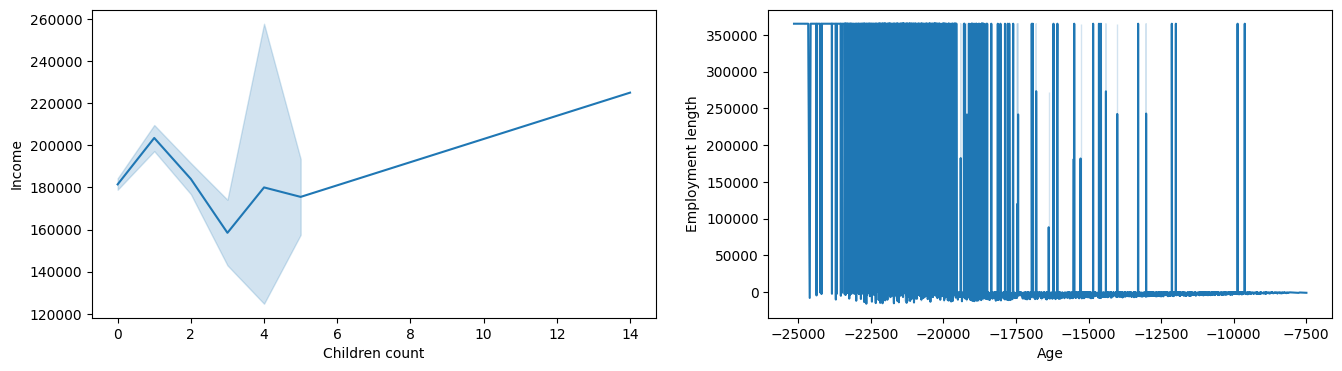

In [406]:
## Test data set
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.lineplot(x=test_df['Children count'], y=test_df['Income'])

plt.subplot(1,2,2)
sns.lineplot(x=test_df['Age'], y=test_df['Employment length'])

<Axes: xlabel='Age', ylabel='Employment length'>

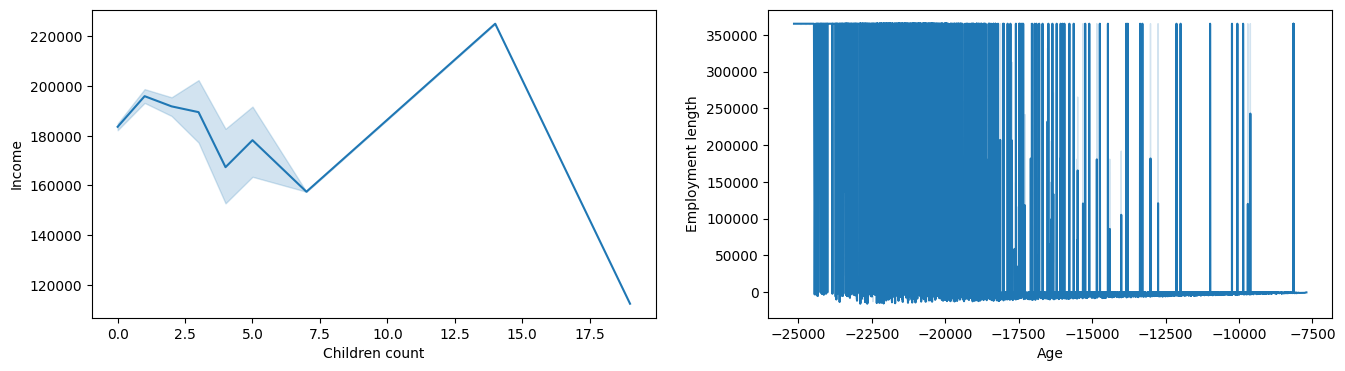

In [407]:
## Train data set
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.lineplot(x=train_df['Children count'], y=train_df['Income'])

plt.subplot(1,2,2)
sns.lineplot(x=train_df['Age'], y=train_df['Employment length'])

In [655]:
test_df.corr()[['Children count','Income']]

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\2455456833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.corr()[['Children count','Income']]


,Children count,Income
ID,0.039124,-0.023177
Children count,1.000000,0.028580
Income,0.028580,1.000000
Age,0.340488,0.066987
Employment length,-0.225038,-0.163423
Has a mobile phone,NaN,NaN
Has a work phone,0.045622,-0.042091
Has a phone,-0.021006,0.000447
Has an email,0.019348,0.067458
Family member count,0.890904,0.017544


In [656]:
train_df.corr()[['Children count','Income']]

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\4081645894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()[['Children count','Income']]


,Children count,Income
ID,0.026291,-0.016257
Children count,1.000000,0.034991
Income,0.034991,1.000000
Age,0.339080,0.068156
Employment length,-0.230468,-0.169940
Has a mobile phone,NaN,NaN
Has a work phone,0.048727,-0.036601
Has a phone,-0.015110,0.021516
Has an email,0.015116,0.091500
Family member count,0.888676,0.025338


## EDA (Exploratory data analysis

#### Univariate Analysis

In [657]:
### Gender
test_df['Gender'].value_counts()

F    4881
M    2411
Name: Gender, dtype: int64

In [658]:
train_df['Gender'].value_counts()

F    19549
M     9616
Name: Gender, dtype: int64

In [659]:
### check number of categories and their counts in ecah column, and also minimum and maximum value of numeric columns
for i in test_df.columns:
    print(i)
    print(test_df[i].value_counts())
    if test_df[i].dtype == 'int64' or test_df[i].dtype == 'float64':
        print("Minimum:", test_df[i].min())
        print("Maximum:", test_df[i].max())
    print("  ")

ID
5091261    1
5066548    1
5137310    1
5010838    1
5111128    1
          ..
5042149    1
5091331    1
5061723    1
5111092    1
5022903    1
Name: ID, Length: 7292, dtype: int64
Minimum: 5008809
Maximum: 5150487
  
Gender
F    4881
M    2411
Name: Gender, dtype: int64
  
Has a car
N    4486
Y    2806
Name: Has a car, dtype: int64
  
Has a property
Y    4949
N    2343
Name: Has a property, dtype: int64
  
Children count
0     5058
1     1489
2      632
3       96
4       11
5        5
14       1
Name: Children count, dtype: int64
Minimum: 0
Maximum: 14
  
Income
135000.0    841
157500.0    620
180000.0    610
112500.0    597
225000.0    553
           ... 
92250.0       1
179100.0      1
369000.0      1
178200.0      1
62100.0       1
Name: Income, Length: 190, dtype: int64
Minimum: 27000.0
Maximum: 1575000.0
  
Employment status
Working                 3763
Commercial associate    1689
Pensioner               1232
State servant            604
Student                    4
Name: Emp

In [660]:
### check number of categories and their counts in ecah column, and also minimum and maximum value of numeric columns
for i in train_df.columns:
    print(i)
    print(train_df[i].value_counts())
    if train_df[i].dtype == 'int64' or train_df[i].dtype == 'float64':
        print("Minimum:", train_df[i].min())
        print("Maximum:", train_df[i].max())
    print("  ")

ID
5037048    1
5024541    1
5112625    1
5089643    1
5091778    1
          ..
5035794    1
5022836    1
5143310    1
5142489    1
5062632    1
Name: ID, Length: 29165, dtype: int64
Minimum: 5008804
Maximum: 5150485
  
Gender
F    19549
M     9616
Name: Gender, dtype: int64
  
Has a car
N    18128
Y    11037
Name: Has a car, dtype: int64
  
Has a property
Y    19557
N     9608
Name: Has a property, dtype: int64
  
Children count
0     20143
1      6003
2      2624
3       323
4        52
5        15
7         2
14        2
19        1
Name: Children count, dtype: int64
Minimum: 0
Maximum: 19
  
Income
135000.0    3468
180000.0    2487
157500.0    2469
225000.0    2373
112500.0    2359
            ... 
164250.0       1
42300.0        1
432000.0       1
145350.0       1
82350.0        1
Name: Income, Length: 259, dtype: int64
Minimum: 27000.0
Maximum: 1575000.0
  
Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant  

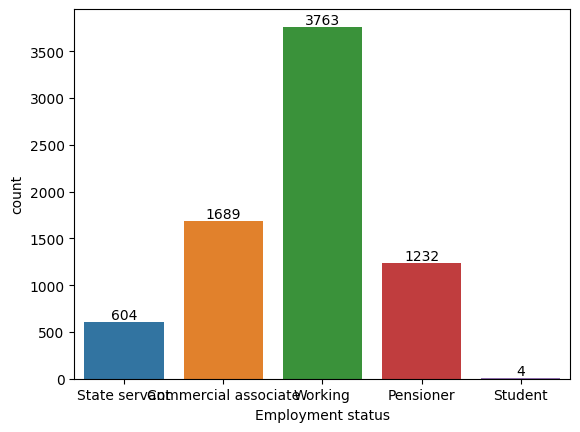

In [661]:
ax=sns.countplot(x='Employment status', data=test_df)
for bars in ax.containers:
    ax.bar_label(bars)

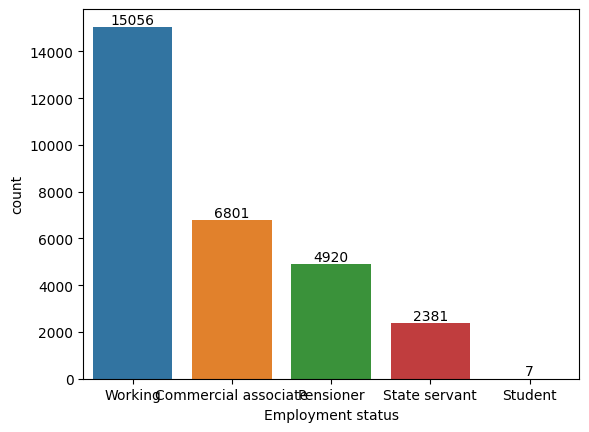

In [662]:
ax=sns.countplot(x='Employment status', data=train_df)
for bars in ax.containers:
    ax.bar_label(bars)

### Data Preprocessing

In [663]:
### Correcting the age column 
import math  # Import the math module

# Correcting the age column. Cverting age -ve to -ve and then days to years.
test_df['Age'] = (test_df['Age'] + 25152) / 365.4
test_df['Age'] = test_df['Age'].apply(math.floor)  # Applying math.floor to each element
test_df['Age'].min()

0

In [664]:
# Correcting the age column. Cverting age -ve to -ve and then days to years.
train_df['Age'] = (train_df['Age'] + 25152) / 365.4
train_df['Age'] = train_df['Age'].apply(math.floor)  # Applying math.floor to each element
train_df['Age'].min()

0

In [665]:
test_df['Age']

0       22
1       19
2        8
3       34
4       35
        ..
7287     9
7288    27
7289    12
7290    17
7291    39
Name: Age, Length: 7292, dtype: int64

In [666]:
train_df['Age']

0        24
1        41
2        33
3        11
4        24
         ..
29160     4
29161    26
29162    20
29163     9
29164    17
Name: Age, Length: 29165, dtype: int64

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\3041180735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

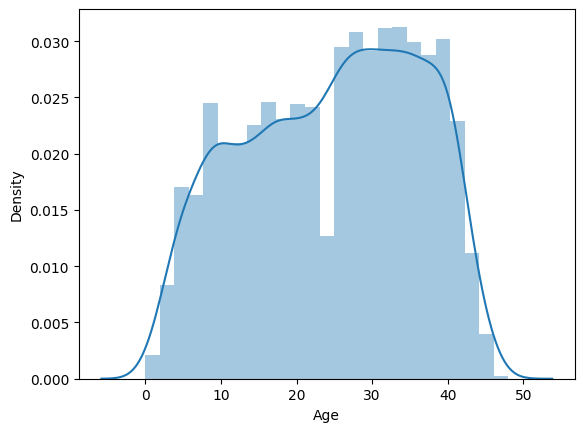

In [667]:
sns.distplot(test_df['Age'])

C:\Users\prash\AppData\Local\Temp\ipykernel_25484\2951157067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

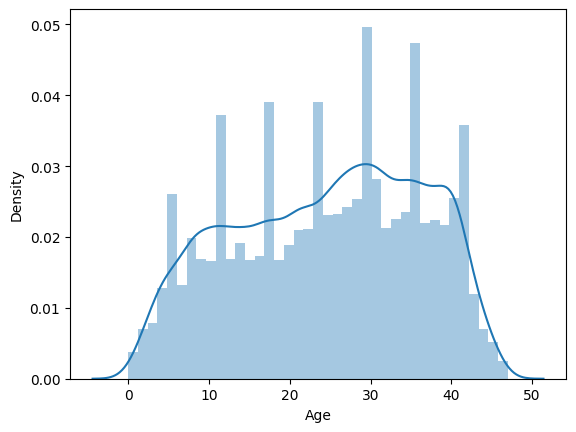

In [668]:
sns.distplot(train_df['Age'])

In [669]:
test_df.sample(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
4198,5149286,F,Y,Y,1,225000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,26,-290,1,0,0,0,Sales staff,3.0,-31.0,0
7098,5118382,M,Y,N,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,11,-2745,1,1,1,0,Managers,2.0,-38.0,0
4599,5146577,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,24,-3111,1,0,0,0,Core staff,2.0,-30.0,0
5715,5069502,F,Y,Y,0,180000.0,State servant,Higher education,Married,House / apartment,27,-3700,1,0,0,0,Core staff,2.0,-37.0,0
19,5023302,F,Y,Y,1,67500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,36,-3553,1,0,0,1,NaN,3.0,-8.0,0
4020,5035843,F,N,Y,1,252000.0,Working,Secondary / secondary special,Separated,House / apartment,18,-7404,1,0,0,0,Medicine staff,2.0,-58.0,0
2909,5099984,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,31,-2256,1,1,1,0,Drivers,2.0,-20.0,0
4855,5068043,F,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,23,-1601,1,0,0,0,Security staff,2.0,-8.0,0
3168,5069235,F,Y,Y,0,202500.0,State servant,Secondary / secondary special,Married,House / apartment,36,-4646,1,0,0,1,Medicine staff,2.0,-8.0,0
1061,5046027,M,Y,Y,1,247500.0,State servant,Secondary / secondary special,Married,House / apartment,36,-3579,1,0,0,0,Managers,3.0,-20.0,0


In [670]:
train_df.sample(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
22677,5009420,F,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,16,-464,1,1,1,0,Core staff,1.0,-16.0,0
13557,5044520,F,Y,N,0,202500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,29,-829,1,0,0,0,High skill tech staff,2.0,-6.0,0
7628,5009125,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,25,-432,1,0,0,0,NaN,1.0,-46.0,0
9517,5066522,F,N,Y,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,14,-10780,1,1,1,0,Laborers,2.0,-8.0,0
12160,5139703,F,N,Y,0,180000.0,Pensioner,Higher education,Separated,House / apartment,3,365243,1,0,0,0,NaN,1.0,-60.0,0


### Correcting and scaling of 'Employment length'

In [671]:
## Test dataset
df1=test_df[test_df['Employment length']<365243]


In [672]:
train_df['Employment length'].max()

365243

In [673]:
df2=train_df[train_df['Employment length']<365243]


In [674]:
df1['Employment length'].max()

-17

In [675]:
df2['Employment length'].max()

-17

In [676]:
newtestdf=test_df['Employment length'].replace(365243,-17)

In [677]:
newtestdf

0      -1692
1       -948
2      -5215
3       -456
4       -667
        ... 
7287   -1351
7288   -3550
7289   -5030
7290   -6678
7291   -2196
Name: Employment length, Length: 7292, dtype: int64

In [678]:
newtestdf.min()

-15661

In [679]:
newtestdf.max()

-17

In [680]:
newtestdf.value_counts().sum()

7292

In [681]:
newtestdf=(newtestdf+15661)/365.4 ## In years

In [682]:
newtestdf

0       38.229338
1       40.265463
2       28.587849
3       41.611932
4       41.034483
          ...    
7287    39.162562
7288    33.144499
7289    29.094143
7290    24.584018
7291    36.850027
Name: Employment length, Length: 7292, dtype: float64

In [683]:
newtestdf=newtestdf.apply(math.floor)
newtestdf

0       38
1       40
2       28
3       41
4       41
        ..
7287    39
7288    33
7289    29
7290    24
7291    36
Name: Employment length, Length: 7292, dtype: int64

In [684]:
newtestdf.min()

0

In [685]:
newtestdf.max()

42

In [686]:
newtestdf.value_counts

<bound method IndexOpsMixin.value_counts of 0       38
1       40
2       28
3       41
4       41
        ..
7287    39
7288    33
7289    29
7290    24
7291    36
Name: Employment length, Length: 7292, dtype: int64>

In [687]:
### Training dataset

In [688]:
newtraindf=train_df['Employment length'].replace(365243,-17)

In [689]:
newtraindf.min()

-15713

In [690]:
newtraindf.max()

-17

In [691]:
newtraindf.value_counts().sum()

29165

In [692]:
newtraindf=(newtraindf+15713)/365.4 ## In years

In [693]:
newtraindf

0        34.488232
1        38.483853
2        27.520525
3        37.402846
4        41.592775
           ...    
29160    42.955665
29161    20.407772
29162    33.995621
29163    42.955665
29164    37.501368
Name: Employment length, Length: 29165, dtype: float64

In [694]:
newtraindf=newtraindf.apply(math.floor)
newtraindf

0        34
1        38
2        27
3        37
4        41
         ..
29160    42
29161    20
29162    33
29163    42
29164    37
Name: Employment length, Length: 29165, dtype: int64

In [695]:
newtraindf.min()

0

In [696]:
newtraindf.max()

42

In [697]:
### Correcting the 'Employment length'.  Duration of the applicant's current employment
test_df['Employment length']=newtestdf

In [698]:
test_df.sample(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
303,5135462,F,N,Y,3,37800.0,Pensioner,Secondary / secondary special,Married,House / apartment,33,42,1,0,0,0,NaN,5.0,-1.0,0
7242,5025850,F,N,Y,0,49500.0,Pensioner,Secondary / secondary special,Married,House / apartment,7,42,1,0,0,0,NaN,2.0,-55.0,0


In [699]:
### Correcting the 'Employment length'.  Duration of the applicant's current employment
train_df['Employment length']=newtraindf

In [700]:
train_df.sample(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
25504,5042143,F,N,N,0,247500.0,Working,Higher education,Married,House / apartment,30,22,1,1,1,0,Managers,2.0,-5.0,0
23142,5135479,F,N,N,2,121500.0,Working,Secondary / secondary special,Married,With parents,41,41,1,0,0,0,Medicine staff,4.0,-2.0,0


### Outliers detection and removal

In [701]:
import matplotlib.pyplot as plt

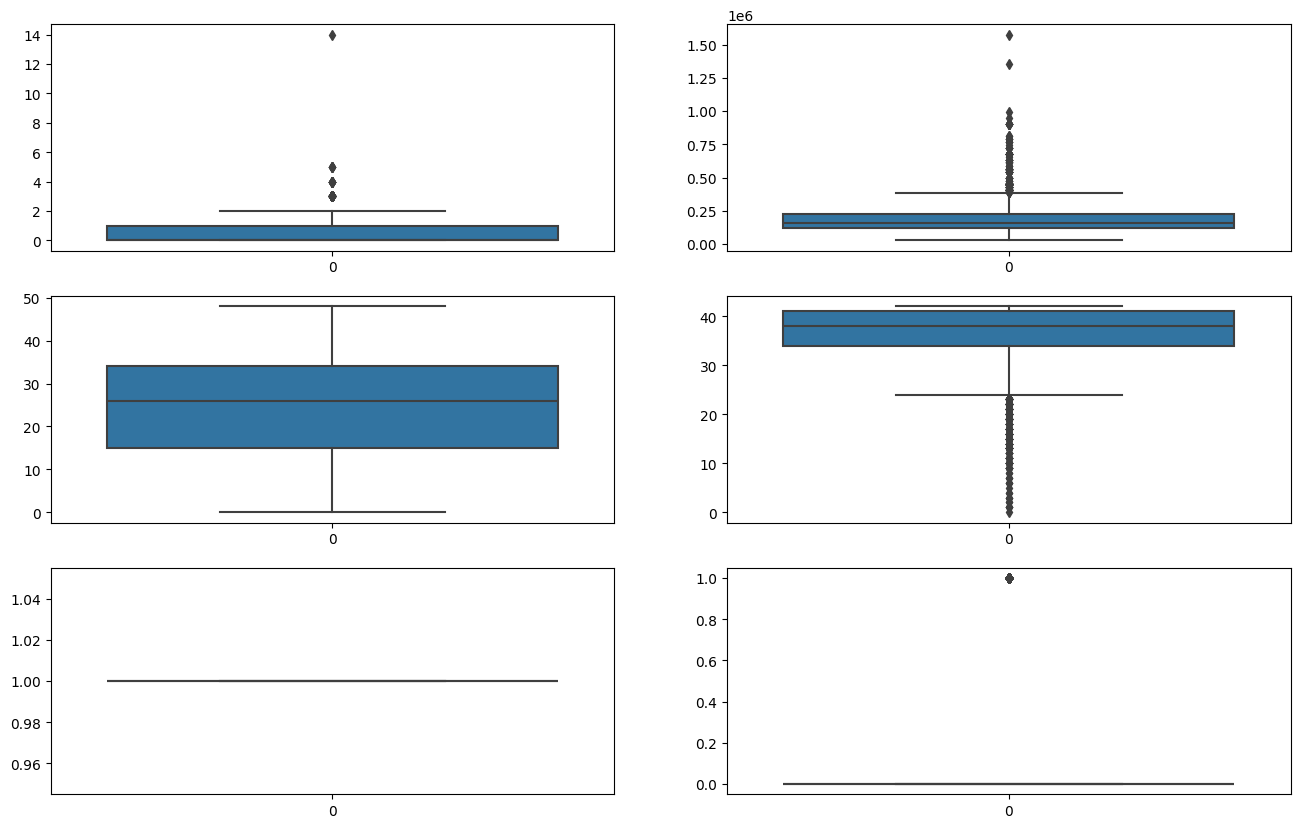

In [702]:

plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(test_df['Children count'])

plt.subplot(3,2,2)
sns.boxplot(test_df['Income'])

plt.subplot(3,2,3)
sns.boxplot(test_df['Age'])

plt.subplot(3,2,4)
sns.boxplot(test_df['Employment length'])

plt.subplot(3,2,5)
sns.boxplot(test_df['Has a mobile phone'])

plt.subplot(3,2,6)
sns.boxplot(test_df['Has a work phone'])

plt.show()

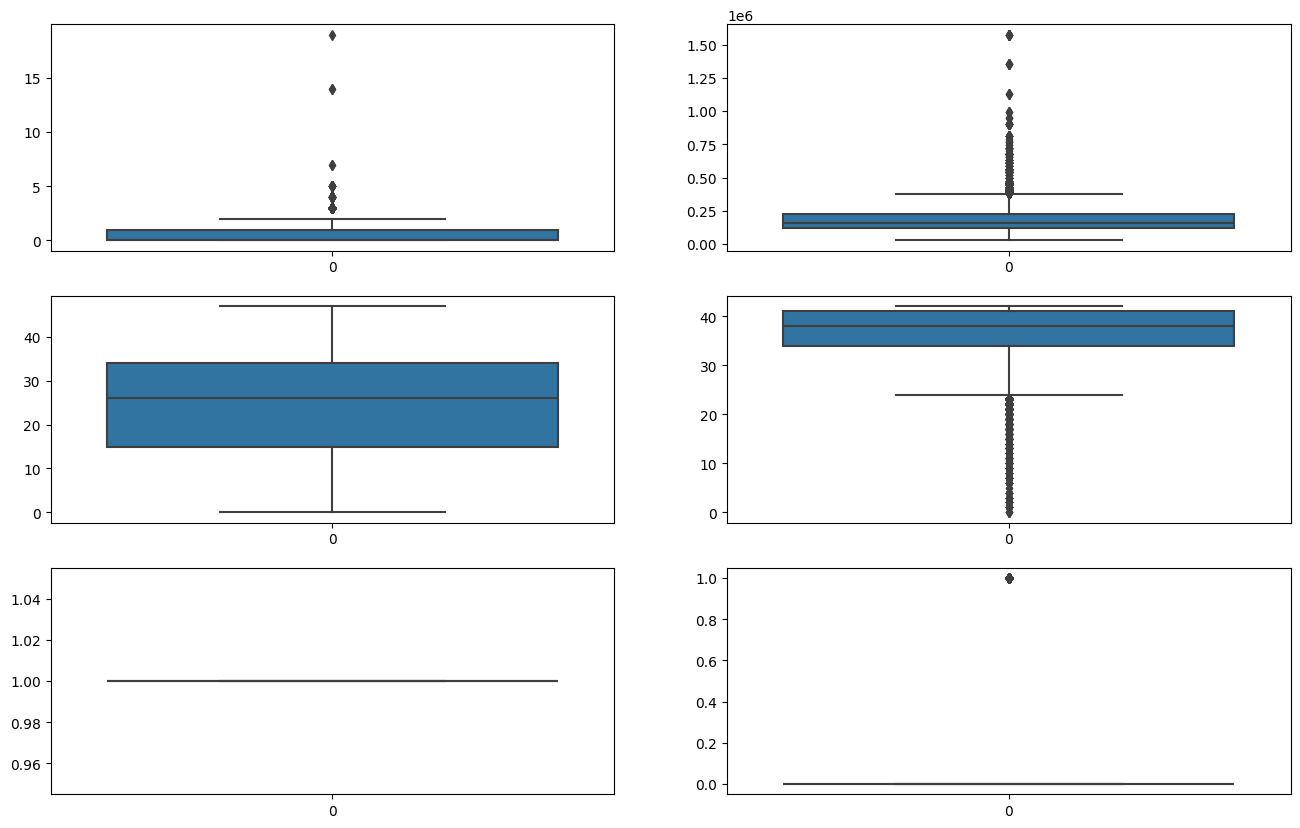

In [703]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
sns.boxplot(train_df['Children count'])

plt.subplot(3,2,2)
sns.boxplot(train_df['Income'])

plt.subplot(3,2,3)
sns.boxplot(train_df['Age'])

plt.subplot(3,2,4)
sns.boxplot(train_df['Employment length'])

plt.subplot(3,2,5)
sns.boxplot(train_df['Has a mobile phone'])

plt.subplot(3,2,6)
sns.boxplot(train_df['Has a work phone'])

plt.show()

In [704]:
### Remove outliers from 'Income'
test_df[ (test_df['Income']  >700000)]['Income'].value_counts()

900000.0     11
720000.0      7
765000.0      4
787500.0      4
810000.0      2
1350000.0     1
1575000.0     1
990000.0      1
742500.0      1
945000.0      1
Name: Income, dtype: int64

In [705]:
# Replace 'Income' values greater than 700000 with 700000
test_df.loc[test_df['Income'] > 700000, 'Income'] = 700000


In [706]:
test_df[ (test_df['Income']  >700000)]['Income'].value_counts()

Series([], Name: Income, dtype: int64)

In [707]:
train_df[ (train_df['Income']  >700000)]['Income'].value_counts()

900000.0     28
810000.0     13
720000.0     12
1575000.0     7
1350000.0     5
765000.0      5
742500.0      4
945000.0      3
990000.0      3
1125000.0     3
716323.5      2
787500.0      1
Name: Income, dtype: int64

In [708]:
# Replace 'Income' values greater than 700000 with 700000
train_df.loc[train_df['Income'] > 700000, 'Income'] = 700000

In [709]:
train_df[ (train_df['Income']  >700000)]['Income'].value_counts()

Series([], Name: Income, dtype: int64)

<Axes: >

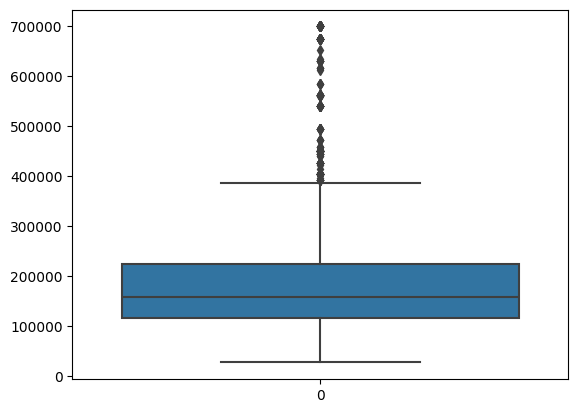

In [710]:
# plt.subplot(3,2,4)
sns.boxplot(test_df['Income'])

<Axes: >

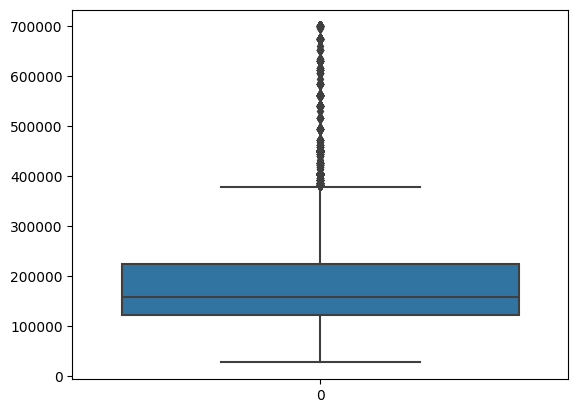

In [711]:
sns.boxplot(train_df['Income'])

### Correcting and scaling of 'Account age'

In [712]:
test_df['Account age']

0       -6.0
1      -16.0
2      -52.0
3      -54.0
4      -48.0
        ... 
7287   -22.0
7288   -42.0
7289   -25.0
7290   -49.0
7291   -36.0
Name: Account age, Length: 7292, dtype: float64

In [713]:
test_df['Account age'].max()

0.0

In [714]:
test_df['Account age'].min()

-60.0

In [715]:
dataFrame=test_df['Account age']+60
dataFrame

0       54.0
1       44.0
2        8.0
3        6.0
4       12.0
        ... 
7287    38.0
7288    18.0
7289    35.0
7290    11.0
7291    24.0
Name: Account age, Length: 7292, dtype: float64

<Axes: >

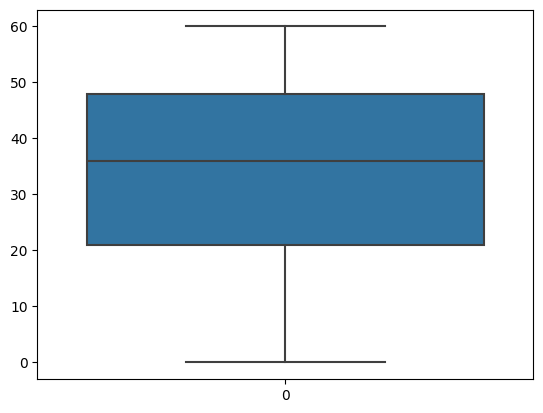

In [716]:
sns.boxplot(dataFrame)

In [717]:
test_df['Account age']=dataFrame

In [718]:
test_df.sample(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
310,5068715,M,Y,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,43,38,1,0,0,0,Laborers,2.0,26.0,0
2510,5115906,F,N,Y,1,157500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,28,41,1,0,0,0,Cooking staff,3.0,48.0,0
1532,5100298,M,Y,N,0,99000.0,Working,Secondary / secondary special,Married,House / apartment,35,42,1,0,0,0,NaN,2.0,38.0,0
2664,5026642,M,Y,N,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19,35,1,1,0,0,Laborers,1.0,7.0,0
1715,5096847,F,N,Y,0,94500.0,Pensioner,Higher education,Single / not married,House / apartment,7,42,1,0,0,0,NaN,1.0,33.0,0


<Axes: xlabel='Age', ylabel='Income'>

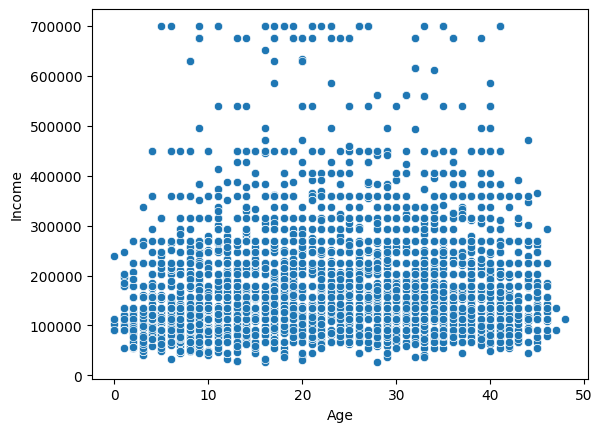

In [719]:
sns.scatterplot(y=test_df['Income'],x=test_df['Age'])

In [720]:
train_df['Account age']

0       -17.0
1        -1.0
2       -38.0
3       -11.0
4       -41.0
         ... 
29160    -5.0
29161   -24.0
29162   -29.0
29163   -37.0
29164   -43.0
Name: Account age, Length: 29165, dtype: float64

In [721]:
train_df['Account age'].min()

-60.0

In [722]:
train_df['Account age'].max()

0.0

In [723]:
train_df['Account age']=train_df['Account age']+60

In [724]:
train_df['Account age'].min()

0.0

In [725]:
train_df['Account age'].max()

60.0

### Add 'Other' category for null values of 'Job titles'

In [726]:
### Correct the 'Job title'

In [727]:
test_df['Job title'].isnull().value_counts()

False    4996
True     2296
Name: Job title, dtype: int64

In [728]:
test_df['Job title'].value_counts()

Laborers                 1207
Core staff                725
Sales staff               712
Managers                  590
Drivers                   416
Medicine staff            251
High skill tech staff     250
Accountants               243
Cooking staff             134
Security staff            128
Cleaning staff            126
Private service staff      57
Waiters/barmen staff       47
Low-skill Laborers         37
Secretaries                29
Realty agents              19
HR staff                   13
IT staff                   12
Name: Job title, dtype: int64

In [729]:
test_df['Job title']=test_df['Job title'].fillna('Other')

In [730]:
test_df['Job title'].value_counts()

Other                    2296
Laborers                 1207
Core staff                725
Sales staff               712
Managers                  590
Drivers                   416
Medicine staff            251
High skill tech staff     250
Accountants               243
Cooking staff             134
Security staff            128
Cleaning staff            126
Private service staff      57
Waiters/barmen staff       47
Low-skill Laborers         37
Secretaries                29
Realty agents              19
HR staff                   13
IT staff                   12
Name: Job title, dtype: int64

In [731]:
test_df['Job title'].isnull().value_counts()

False    7292
Name: Job title, dtype: int64

In [732]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [733]:
test_df.sample(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
2415,5028757,F,Y,N,1,337500.0,Working,Higher education,Married,House / apartment,39,35,1,0,0,0,Other,3.0,17.0,0
6719,5089894,F,N,Y,0,67500.0,Pensioner,Higher education,Single / not married,Municipal apartment,3,42,1,0,0,1,Other,1.0,25.0,0
2640,5061415,F,N,Y,0,157500.0,Working,Higher education,Married,House / apartment,21,39,1,0,0,1,Core staff,2.0,42.0,0
2209,5087972,M,N,Y,0,99000.0,Working,Higher education,Married,Co-op apartment,41,41,1,0,0,0,Managers,2.0,39.0,0
98,5047929,M,Y,N,0,292500.0,Working,Secondary / secondary special,Single / not married,House / apartment,30,38,1,0,1,0,Drivers,1.0,42.0,0
6835,5113620,M,N,N,0,225000.0,Working,Secondary / secondary special,Widow,Municipal apartment,15,41,1,0,0,0,Security staff,1.0,52.0,0
4756,5053006,F,N,N,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,16,10,1,0,0,0,Medicine staff,1.0,34.0,0
4306,5023635,M,N,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,35,36,1,1,0,0,Laborers,3.0,14.0,0
6685,5054424,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,36,38,1,1,0,0,Core staff,2.0,51.0,0
6417,5085831,M,Y,Y,1,247500.0,Working,Secondary / secondary special,Married,House / apartment,31,36,1,0,0,0,Laborers,3.0,37.0,0


In [734]:
##### correct the 'Gender'

In [735]:
test_df['Gender'].value_counts()

F    4881
M    2411
Name: Gender, dtype: int64

In [736]:
test_df['Gender'] = test_df['Gender'].replace(['F', 'M'], [1, 0])

In [737]:
test_df['Gender'].value_counts()

1    4881
0    2411
Name: Gender, dtype: int64

In [738]:
test_df['Gender']

0       1
1       0
2       1
3       1
4       1
       ..
7287    1
7288    1
7289    1
7290    1
7291    1
Name: Gender, Length: 7292, dtype: int64

In [739]:
train_df['Gender'].value_counts()

F    19549
M     9616
Name: Gender, dtype: int64

In [740]:
train_df['Gender'] = train_df['Gender'].replace(['F', 'M'], [1, 0])

In [741]:
train_df['Gender'].value_counts()

1    19549
0     9616
Name: Gender, dtype: int64

In [742]:
train_df['Gender']

0        0
1        1
2        1
3        1
4        1
        ..
29160    1
29161    1
29162    1
29163    1
29164    1
Name: Gender, Length: 29165, dtype: int64

In [743]:
####Scaling on Income column
test_df['Income'] = test_df['Income']/100000

In [744]:
test_df['Income']

0       2.0250
1       6.7500
2       2.3400
3       4.4550
4       2.2500
         ...  
7287    1.3500
7288    1.5750
7289    0.6750
7290    0.9585
7291    1.3500
Name: Income, Length: 7292, dtype: float64

In [745]:
train_df['Income'] = train_df['Income']/100000

In [746]:
train_df['Income']

0        1.350
1        1.350
2        1.800
3        3.600
4        2.700
         ...  
29160    1.125
29161    1.350
29162    0.765
29163    1.575
29164    5.850
Name: Income, Length: 29165, dtype: float64

## Encoding of categorical columns/features

In [747]:
### Encoding of  'Has a car'. Replace Y to 1 and N to 0

In [748]:
test_df['Has a car'].value_counts()

N    4486
Y    2806
Name: Has a car, dtype: int64

In [749]:
test_df['Has a car'] = test_df['Has a car'].replace(['Y', 'N'], [1, 0])

In [750]:
test_df['Has a car'].value_counts()

0    4486
1    2806
Name: Has a car, dtype: int64

In [751]:
#Train dataset
train_df['Has a car'].value_counts()

N    18128
Y    11037
Name: Has a car, dtype: int64

In [752]:
train_df['Has a car'] = train_df['Has a car'].replace(['Y', 'N'], [1, 0])

In [753]:
train_df['Has a car'].value_counts()

0    18128
1    11037
Name: Has a car, dtype: int64

In [754]:
## Encoding for 	Employment status

In [755]:
test_df['Employment status'].value_counts()

Working                 3763
Commercial associate    1689
Pensioner               1232
State servant            604
Student                    4
Name: Employment status, dtype: int64

In [756]:
test_df['Employment status'] = test_df['Employment status'].replace(['Working', 'Commercial associate','Pensioner','State servant','Student'], [0, 1,2,3,4])

In [757]:
test_df['Employment status'].value_counts()

0    3763
1    1689
2    1232
3     604
4       4
Name: Employment status, dtype: int64

In [758]:
test_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,Y,0,2.025,3,Secondary / secondary special,Separated,House / apartment,22,38,1,0,0,0,Medicine staff,1.0,54.0,0
1,5096963,0,1,N,0,6.750,1,Higher education,Married,House / apartment,19,40,1,0,1,0,Managers,2.0,44.0,0
2,5087880,1,0,N,0,2.340,3,Higher education,Civil marriage,House / apartment,8,28,1,0,0,1,Core staff,2.0,8.0,0
3,5021949,1,1,Y,0,4.455,1,Higher education,Married,House / apartment,34,41,1,0,0,0,Managers,2.0,6.0,0
4,5105705,1,1,N,0,2.250,0,Secondary / secondary special,Married,Municipal apartment,35,41,1,0,0,0,Laborers,2.0,12.0,0


In [759]:
## Train dataset
train_df['Employment status'].value_counts()

Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: Employment status, dtype: int64

In [760]:
train_df['Employment status'] = train_df['Employment status'].replace(['Working', 'Commercial associate','Pensioner','State servant','Student'], [0, 1,2,3,4])

In [761]:
train_df['Employment status'].value_counts()

0    15056
1     6801
2     4920
3     2381
4        7
Name: Employment status, dtype: int64

In [762]:
### Encoding for 'Education level'

In [763]:
test_df['Education level'].value_counts()

Secondary / secondary special    4974
Higher education                 1954
Incomplete higher                 281
Lower secondary                    76
Academic degree                     7
Name: Education level, dtype: int64

In [764]:
test_df['Education level'] = test_df['Education level'].replace(['Secondary / secondary special', 'Higher education','Incomplete higher','Lower secondary','Academic degree'], [0, 1,2,3,4])

In [765]:
test_df['Education level'].value_counts()

0    4974
1    1954
2     281
3      76
4       7
Name: Education level, dtype: int64

In [766]:
## Train dataset
train_df['Education level'].value_counts()

Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: Education level, dtype: int64

In [767]:
train_df['Education level'] = train_df['Education level'].replace(['Secondary / secondary special', 'Higher education','Incomplete higher','Lower secondary','Academic degree'], [0, 1,2,3,4])

In [768]:
train_df['Education level'].value_counts()

0    19803
1     7910
2     1129
3      298
4       25
Name: Education level, dtype: int64

In [769]:
test_df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,Y,0,2.025,3,0,Separated,House / apartment,22,38,1,0,0,0,Medicine staff,1.0,54.0,0
1,5096963,0,1,N,0,6.750,1,1,Married,House / apartment,19,40,1,0,1,0,Managers,2.0,44.0,0


In [770]:
## Encoding for Marital status

In [771]:
## Test dataset
test_df['Marital status'].value_counts()

Married                 5004
Single / not married     965
Civil marriage           633
Separated                391
Widow                    299
Name: Marital status, dtype: int64

In [772]:
test_df['Marital status'] = test_df['Marital status'].replace(['Married','Single / not married','Civil marriage','Separated','Widow'], [0, 1,2,3,4])

In [773]:
test_df['Marital status'].value_counts()

0    5004
1     965
2     633
3     391
4     299
Name: Marital status, dtype: int64

In [774]:
### Train dataset
train_df['Marital status'].value_counts()

Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: Marital status, dtype: int64

In [775]:
train_df['Marital status'] = train_df['Marital status'].replace(['Married','Single / not married','Civil marriage','Separated','Widow'], [0, 1,2,3,4])

In [776]:
train_df['Marital status'].value_counts()

0    20044
1     3864
2     2312
3     1712
4     1233
Name: Marital status, dtype: int64

In [777]:
test_df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,Y,0,2.025,3,0,3,House / apartment,22,38,1,0,0,0,Medicine staff,1.0,54.0,0
1,5096963,0,1,N,0,6.750,1,1,0,House / apartment,19,40,1,0,1,0,Managers,2.0,44.0,0


In [778]:
## Encoding for Dwelling

In [779]:
### Test dataset
test_df['Dwelling'].value_counts()

House / apartment      6489
With parents            370
Municipal apartment     216
Rented apartment        122
Office apartment         54
Co-op apartment          41
Name: Dwelling, dtype: int64

In [780]:
test_df['Dwelling'] = test_df['Dwelling'].replace(['House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], [0, 1,2,3,4,5])

In [781]:
test_df['Dwelling'].value_counts()

0    6489
1     370
2     216
3     122
4      54
5      41
Name: Dwelling, dtype: int64

In [782]:
### Train dataset
train_df['Dwelling'].value_counts()

House / apartment      26059
With parents            1406
Municipal apartment      912
Rented apartment         453
Office apartment         208
Co-op apartment          127
Name: Dwelling, dtype: int64

In [783]:
train_df['Dwelling'] = train_df['Dwelling'].replace(['House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], [0, 1,2,3,4,5])

In [784]:
train_df['Dwelling'].value_counts()

0    26059
1     1406
2      912
3      453
4      208
5      127
Name: Dwelling, dtype: int64

In [785]:
test_df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,Y,0,2.025,3,0,3,0,22,38,1,0,0,0,Medicine staff,1.0,54.0,0
1,5096963,0,1,N,0,6.750,1,1,0,0,19,40,1,0,1,0,Managers,2.0,44.0,0


In [786]:
### Encoding for Job title

In [787]:
## Test dataset
test_df['Job title'].value_counts()

Other                    2296
Laborers                 1207
Core staff                725
Sales staff               712
Managers                  590
Drivers                   416
Medicine staff            251
High skill tech staff     250
Accountants               243
Cooking staff             134
Security staff            128
Cleaning staff            126
Private service staff      57
Waiters/barmen staff       47
Low-skill Laborers         37
Secretaries                29
Realty agents              19
HR staff                   13
IT staff                   12
Name: Job title, dtype: int64

In [788]:
categories=test_df['Job title'].unique()

In [789]:
categories

array(['Medicine staff', 'Managers', 'Core staff', 'Laborers', 'Other',
       'Sales staff', 'Waiters/barmen staff', 'High skill tech staff',
       'Drivers', 'HR staff', 'Cleaning staff', 'Accountants',
       'Realty agents', 'Security staff', 'Secretaries', 'Cooking staff',
       'Private service staff', 'IT staff', 'Low-skill Laborers'],
      dtype=object)

In [790]:
for i in range(len(categories)):
    print(i,categories[i])

0 Medicine staff
1 Managers
2 Core staff
3 Laborers
4 Other
5 Sales staff
6 Waiters/barmen staff
7 High skill tech staff
8 Drivers
9 HR staff
10 Cleaning staff
11 Accountants
12 Realty agents
13 Security staff
14 Secretaries
15 Cooking staff
16 Private service staff
17 IT staff
18 Low-skill Laborers


In [791]:
for i in range(len(categories)):
    test_df['Job title'].replace(categories[i], i, inplace=True)

In [792]:
test_df['Job title'].value_counts()

4     2296
3     1207
2      725
5      712
1      590
8      416
0      251
7      250
11     243
15     134
13     128
10     126
16      57
6       47
18      37
14      29
12      19
9       13
17      12
Name: Job title, dtype: int64

In [793]:
## Train dataset
train_df['Job title'].value_counts()

Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: Job title, dtype: int64

In [794]:
train_df['Job title'].isnull().value_counts()

False    20138
True      9027
Name: Job title, dtype: int64

In [795]:
train_df['Job title']=train_df['Job title'].fillna('Other')

In [796]:
train_df['Job title'].value_counts()

Other                    9027
Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: Job title, dtype: int64

In [797]:
for i in range(len(categories)):
    train_df['Job title'].replace(categories[i], i, inplace=True)

In [798]:
train_df['Job title'].value_counts()

4     9027
3     5004
2     2866
5     2773
1     2422
8     1722
7     1133
11     998
0      956
15     521
13     464
10     425
16     287
18     138
6      127
14     122
9       72
12      60
17      48
Name: Job title, dtype: int64

In [799]:
test_df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,Y,0,2.025,3,0,3,0,22,38,1,0,0,0,0,1.0,54.0,0
1,5096963,0,1,N,0,6.750,1,1,0,0,19,40,1,0,1,0,1,2.0,44.0,0


In [800]:
### Encoding of 'Has a property'
### Test dataset
test_df['Has a property'].value_counts()

Y    4949
N    2343
Name: Has a property, dtype: int64

In [801]:
test_df['Has a property']=test_df['Has a property'].replace(['Y','N'],[1,0]);

In [802]:
test_df['Has a property'].value_counts()

1    4949
0    2343
Name: Has a property, dtype: int64

In [803]:
### Train dataset
train_df['Has a property'].value_counts()

Y    19557
N     9608
Name: Has a property, dtype: int64

In [804]:
train_df['Has a property']=train_df['Has a property'].replace(['Y','N'],[1,0]);

In [805]:
train_df['Has a property'].value_counts()

1    19557
0     9608
Name: Has a property, dtype: int64

In [806]:
test_df.head(2)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,1,0,1,0,2.025,3,0,3,0,22,38,1,0,0,0,0,1.0,54.0,0
1,5096963,0,1,0,0,6.750,1,1,0,0,19,40,1,0,1,0,1,2.0,44.0,0


In [807]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   int64  
 2   Has a car            7292 non-null   int64  
 3   Has a property       7292 non-null   int64  
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   int64  
 7   Education level      7292 non-null   int64  
 8   Marital status       7292 non-null   int64  
 9   Dwelling             7292 non-null   int64  
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [808]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  int64  
 2   Has a car            29165 non-null  int64  
 3   Has a property       29165 non-null  int64  
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  int64  
 7   Education level      29165 non-null  int64  
 8   Marital status       29165 non-null  int64  
 9   Dwelling             29165 non-null  int64  
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

### Drop 'ID' column

In [809]:
## Test dataset
test_df=test_df.drop(['ID'],axis=1);

In [810]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7292 non-null   int64  
 1   Has a car            7292 non-null   int64  
 2   Has a property       7292 non-null   int64  
 3   Children count       7292 non-null   int64  
 4   Income               7292 non-null   float64
 5   Employment status    7292 non-null   int64  
 6   Education level      7292 non-null   int64  
 7   Marital status       7292 non-null   int64  
 8   Dwelling             7292 non-null   int64  
 9   Age                  7292 non-null   int64  
 10  Employment length    7292 non-null   int64  
 11  Has a mobile phone   7292 non-null   int64  
 12  Has a work phone     7292 non-null   int64  
 13  Has a phone          7292 non-null   int64  
 14  Has an email         7292 non-null   int64  
 15  Job title            7292 non-null   i

In [811]:
## Train dataset
train_df=train_df.drop(['ID'],axis=1);

In [812]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29165 non-null  int64  
 1   Has a car            29165 non-null  int64  
 2   Has a property       29165 non-null  int64  
 3   Children count       29165 non-null  int64  
 4   Income               29165 non-null  float64
 5   Employment status    29165 non-null  int64  
 6   Education level      29165 non-null  int64  
 7   Marital status       29165 non-null  int64  
 8   Dwelling             29165 non-null  int64  
 9   Age                  29165 non-null  int64  
 10  Employment length    29165 non-null  int64  
 11  Has a mobile phone   29165 non-null  int64  
 12  Has a work phone     29165 non-null  int64  
 13  Has a phone          29165 non-null  int64  
 14  Has an email         29165 non-null  int64  
 15  Job title            29165 non-null 

### X_test, y_test split

In [813]:
X_test=test_df.drop(['Is high risk'], axis=1)

In [814]:
X_test.head(2)

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age
0,1,0,1,0,2.025,3,0,3,0,22,38,1,0,0,0,0,1.0,54.0
1,0,1,0,0,6.750,1,1,0,0,19,40,1,0,1,0,1,2.0,44.0


In [815]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7292 non-null   int64  
 1   Has a car            7292 non-null   int64  
 2   Has a property       7292 non-null   int64  
 3   Children count       7292 non-null   int64  
 4   Income               7292 non-null   float64
 5   Employment status    7292 non-null   int64  
 6   Education level      7292 non-null   int64  
 7   Marital status       7292 non-null   int64  
 8   Dwelling             7292 non-null   int64  
 9   Age                  7292 non-null   int64  
 10  Employment length    7292 non-null   int64  
 11  Has a mobile phone   7292 non-null   int64  
 12  Has a work phone     7292 non-null   int64  
 13  Has a phone          7292 non-null   int64  
 14  Has an email         7292 non-null   int64  
 15  Job title            7292 non-null   i

In [816]:
y_test=test_df['Is high risk']

In [817]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7292 entries, 0 to 7291
Series name: Is high risk
Non-Null Count  Dtype
--------------  -----
7292 non-null   int64
dtypes: int64(1)
memory usage: 57.1 KB


## X_train, y_train split

In [818]:
train_df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,0,1,1,0,1.35,0,0,0,1,24,34,1,0,0,0,2,2.0,43.0,0
1,1,1,0,1,1.35,1,1,1,0,41,38,1,0,0,0,11,2.0,59.0,0
2,1,0,1,2,1.80,1,0,0,0,33,27,1,0,0,0,3,4.0,22.0,0
3,1,1,1,0,3.60,1,1,1,0,11,37,1,0,0,1,1,1.0,49.0,0
4,1,0,0,0,2.70,0,0,3,0,24,41,1,0,1,0,4,1.0,19.0,0


In [819]:
X_train=train_df.drop(['Is high risk'], axis=1);

In [820]:
X_train.head(2)

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age
0,0,1,1,0,1.35,0,0,0,1,24,34,1,0,0,0,2,2.0,43.0
1,1,1,0,1,1.35,1,1,1,0,41,38,1,0,0,0,11,2.0,59.0


In [821]:
y_train=train_df['Is high risk']

In [822]:
y_train.head(2)

0    0
1    0
Name: Is high risk, dtype: int64

## Different models and their accuracy

In [823]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report, roc_curve

#### 1. Logistic regression

In [824]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()


In [826]:
LR.fit(X_train,y_train)


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [827]:
#Accuracy
y_pred=LR.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  0.9839550191991223


In [828]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision is", precision)

Precision is 0.0


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [829]:
# f1_score
f1Score = f1_score(y_test, y_pred)
print("f1_score is", f1Score)

f1_score is 0.0


In [830]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred)
print("rocAuc is", rocAuc)

rocAuc is 0.5


In [831]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall is", recall)

Recall is 0.0


In [832]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7175    0]
 [ 117    0]]


In [833]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



C:\Users\prash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Decision Tree

In [836]:
from sklearn.tree import ExtraTreeClassifier
Dt=ExtraTreeClassifier()
Dt.fit(X_train,y_train)
y_pred2=Dt.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred2))

Accuracy is  0.9732583653318705


In [837]:
## recall
recall2 = recall_score(y_test, y_pred2)
print("Recall is", recall2)

Recall is 0.23076923076923078


In [838]:
# Precision
precision2 = precision_score(y_test, y_pred2)
print("Precision is", precision2)

Precision is 0.20454545454545456


In [839]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7070  105]
 [  90   27]]


In [856]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred2)
print("rocAuc is", rocAuc)

rocAuc is 0.6080675422138837


In [857]:
# f1_score
f1Score = f1_score(y_test, y_pred2)
print("f1_score is", f1Score)

f1_score is 0.2168674698795181


In [840]:
# Generate classification report
report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.20      0.23      0.22       117

    accuracy                           0.97      7292
   macro avg       0.60      0.61      0.60      7292
weighted avg       0.97      0.97      0.97      7292



## 3. Random Forest

In [841]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred3=RF.predict(X_test)
print("Accuracy is ",accuracy_score(y_test,y_pred3))

Accuracy is  0.9820351069665386


In [842]:
recall3 = recall_score(y_test, y_pred3)
print("Recall is", recall3)

Recall is 0.1282051282051282


In [843]:
# Precision
precision3 = precision_score(y_test, y_pred3)
print("Precision is", precision3)

Precision is 0.3409090909090909


In [844]:
cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7146   29]
 [ 102   15]]


In [845]:
# Generate classification report
report = classification_report(y_test, y_pred3)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.34      0.13      0.19       117

    accuracy                           0.98      7292
   macro avg       0.66      0.56      0.59      7292
weighted avg       0.98      0.98      0.98      7292



## 4.  Boosting Algorithms

#### A. Gradient Boosting

In [846]:
from sklearn.ensemble import GradientBoostingClassifier

In [847]:
# Create the Gradient Boosting model
GB = GradientBoostingClassifier()

In [848]:
# Fit the model to the training data
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [849]:
# Predict on the test data
y_pred_gb = GB.predict(X_test)

In [850]:
# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy is ", accuracy_gb)

Gradient Boosting Accuracy is  0.9836807460230389


In [851]:
recall4 = recall_score(y_test, y_pred_gb)
print("Recall is", recall4)

Recall is 0.008547008547008548


In [852]:
# Precision
precision4 = precision_score(y_test, y_pred_gb)
print("Precision is", precision4)

Precision is 0.25


In [858]:
cm = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7172    3]
 [ 116    1]]


In [859]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred_gb)
print("rocAuc is", rocAuc)

rocAuc is 0.5040644450400548


In [860]:
# f1_score
f1Score = f1_score(y_test, y_pred_gb)
print("f1_score is", f1Score)

f1_score is 0.01652892561983471


#### B. AdaBoost

In [861]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
y_pred_ab = AB.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("AdaBoost Accuracy is ", accuracy_ab)


AdaBoost Accuracy is  0.9839550191991223


In [862]:
# Precision
precision4 = precision_score(y_test, y_pred_ab)
print("Precision is", precision4)

Precision is 0.0


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [863]:
recall = recall_score(y_test, y_pred_ab)
print("Recall is", recall)

Recall is 0.0


In [864]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_ab)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7175    0]
 [ 117    0]]


In [865]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred_ab)
print("rocAuc is", rocAuc)

rocAuc is 0.5


In [866]:
# f1_score
f1Score = f1_score(y_test, y_pred_ab)
print("f1_score is", f1Score)

f1_score is 0.0


#### C. XGBoost


In [867]:
# !pip install xgboost


In [868]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy is ", accuracy_xgb)


XGBoost Accuracy is  0.9835436094349973


In [869]:
# Precision
precision = precision_score(y_test, y_pred_xgb)
print("Precision is", precision)

Precision is 0.42105263157894735


In [871]:
# recal
recall = recall_score(y_test, y_pred_xgb)
print("Recall is", recall)

Recall is 0.06837606837606838


In [873]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7164   11]
 [ 109    8]]


In [874]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred_xgb)
print("rocAuc is", rocAuc)

rocAuc is 0.5334214836653861


In [875]:
# f1_score
f1Score = f1_score(y_test, y_pred_xgb)
print("f1_score is", f1Score)

f1_score is 0.11764705882352942


#### D. LightGBM

In [876]:
# !pip install lightgbm


In [877]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
LGB.fit(X_train, y_train)
y_pred_lgb = LGB.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Accuracy is ", accuracy_lgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 499, number of negative: 28666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 29165, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017110 -> initscore=-4.050861
[LightGBM] [Info] Start training from score -4.050861
LightGBM Accuracy is  0.9834064728469556


In [878]:
# Precision
precision = precision_score(y_test, y_pred_lgb)
print("Precision is", precision)

Precision is 0.3333333333333333


In [879]:
# recal
recall = recall_score(y_test, y_pred_lgb)
print("Recall is", recall)

Recall is 0.03418803418803419


In [880]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7167    8]
 [ 113    4]]


In [881]:
# ROC AUC Score
rocAuc = roc_auc_score(y_test, y_pred_lgb)
print("rocAuc is", rocAuc)

rocAuc is 0.5165365258048186


#### Prediction

In [205]:
X_test[0:5]

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age
0,1,0,1,0,2.025,3,0,3,0,22,38,1,0,0,0,0,1.0,54.0
1,0,1,0,0,6.750,1,1,0,0,19,40,1,0,1,0,1,2.0,44.0
2,1,0,0,0,2.340,3,1,2,0,8,28,1,0,0,1,2,2.0,8.0
3,1,1,1,0,4.455,1,1,0,0,34,41,1,0,0,0,1,2.0,6.0
4,1,1,0,0,2.250,0,0,0,2,35,41,1,0,0,0,3,2.0,12.0


In [883]:
result=Dt.predict(X_test)

In [887]:
j=0
for i in result:
    if i==1:
        j=j+1
        print(i)
print("j",j)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
j 132


In [207]:
y_test.value_counts()

0    7175
1     117
Name: Is high risk, dtype: int64

In [208]:
# Importing modal

### Using decision tree model for prediction

In [888]:
# import pickle
# pickle.dump(Dt,open('Credit_card_approval.pkl','wb'))

In [212]:
# import pickle
# pickle.dump(LR,open('Credit_card_approval2.pkl','wb'))